In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [2]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
df = pd.read_csv('seeds.csv')
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [5]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [6]:
df.Type.replace({1 :"Kama" , 2 :"Rosa" , 3 :"Canadian"} , inplace = True)

In [7]:
X = df.iloc[:,:-1]# indepented variable and droping Patinet ID
y = df.iloc[:,-1]# Target Data

In [8]:
X.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [9]:
y.head()

0    Kama
1    Kama
2    Kama
3    Kama
4    Kama
Name: Type, dtype: object

In [10]:
all_results_valid = {}
all_results_test = {}

In [11]:
#Create training and testing variables by splitting data into 80:20 train:test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create testing and validation variables by splitting data into 50:50 train:test ratio
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"Total:{X.shape}{y.shape}")
print(f"Train:{X_train.shape}{y_train.shape}")
print(f"Test:{X_test.shape}{y_test.shape}")
print(f"Validation:{X_valid.shape}{y_valid.shape}")

Total:(199, 7)(199,)
Train:(139, 7)(139,)
Test:(30, 7)(30,)
Validation:(30, 7)(30,)


In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [13]:
# Decision tree classifier
dtclf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtclf = dtclf.fit(X_train,y_train)
dtc_pred_test = dtclf.predict(X_test)

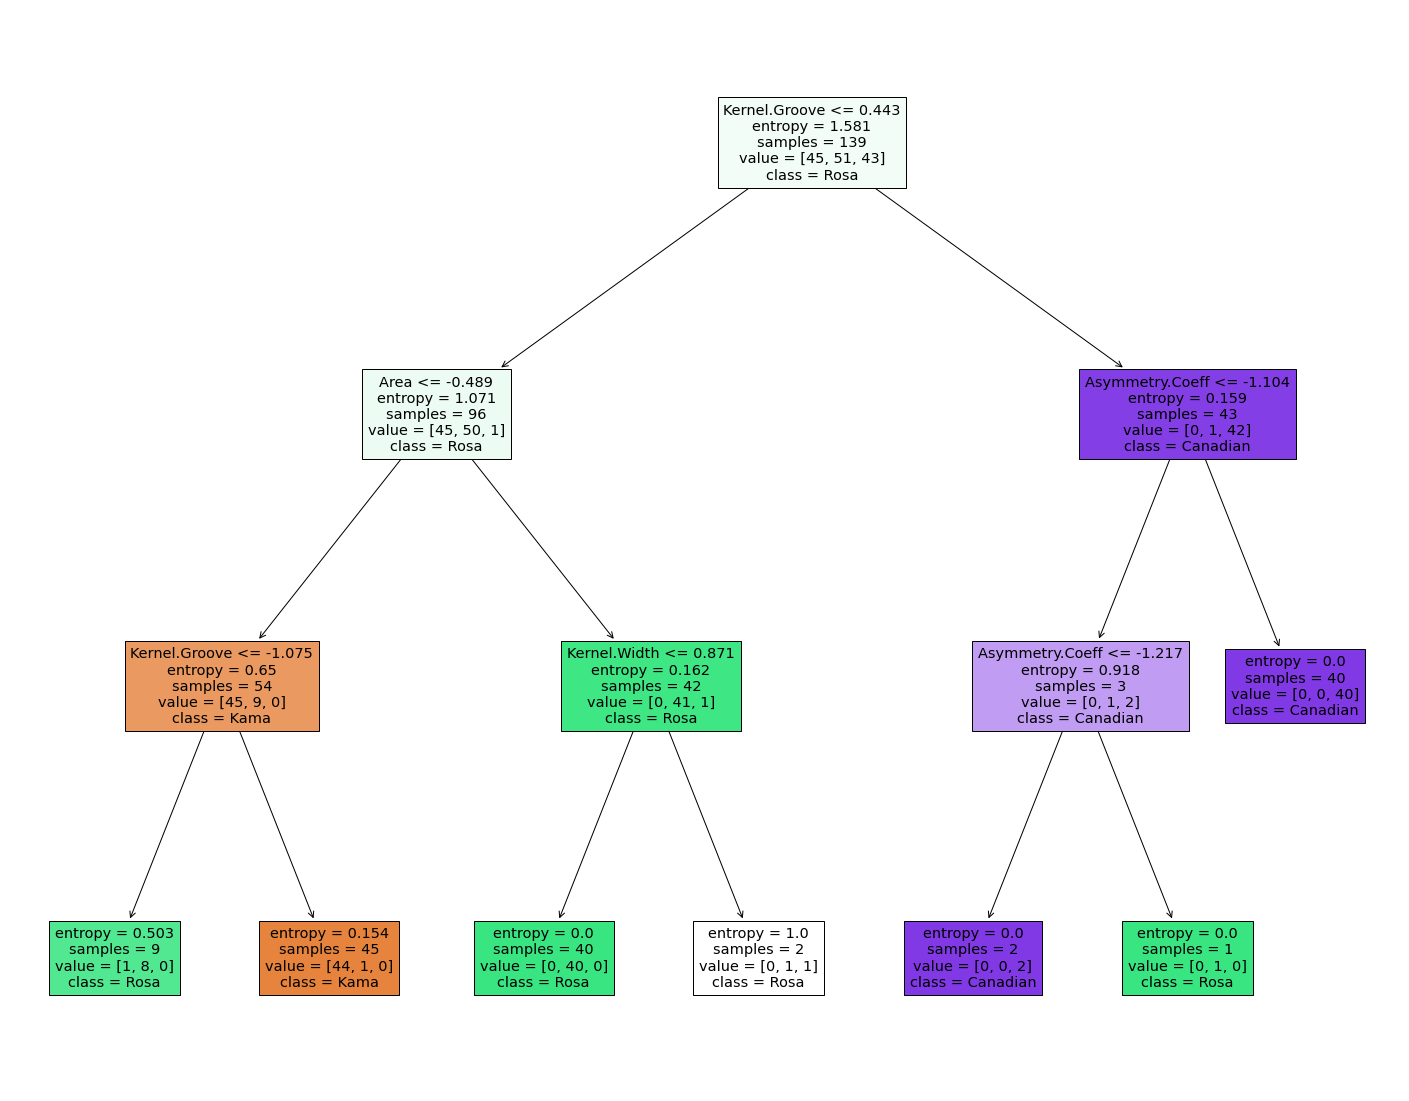

In [14]:
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(dtclf, 
                   feature_names=X.columns,  
                   class_names=['Kama','Rosa','Canadian'],
                   filled=True)

In [15]:
print(classification_report(y_test,dtc_pred_test))

              precision    recall  f1-score   support

    Canadian       0.89      0.89      0.89         9
        Kama       0.60      0.86      0.71         7
        Rosa       1.00      0.79      0.88        14

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.82        30
weighted avg       0.87      0.83      0.84        30



In [16]:
# Decision tree classifier
dtc_pred = dtclf.predict(X_valid)
print(classification_report(y_valid,dtc_pred))

              precision    recall  f1-score   support

    Canadian       0.75      0.82      0.78        11
        Kama       0.71      0.62      0.67         8
        Rosa       1.00      1.00      1.00        11

    accuracy                           0.83        30
   macro avg       0.82      0.81      0.82        30
weighted avg       0.83      0.83      0.83        30



In [17]:
all_results_valid['decision_tree'] = accuracy_score(y_valid, dtc_pred)
all_results_test['decision_tree'] = accuracy_score(y_test, dtc_pred_test)

In [18]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.001)
log_reg.fit(X_train,y_train)
log_pred_test = log_reg.predict(X_test)

In [19]:
print(classification_report(y_test,log_pred_test))

              precision    recall  f1-score   support

    Canadian       1.00      0.89      0.94         9
        Kama       0.64      1.00      0.78         7
        Rosa       1.00      0.79      0.88        14

    accuracy                           0.87        30
   macro avg       0.88      0.89      0.87        30
weighted avg       0.92      0.87      0.87        30



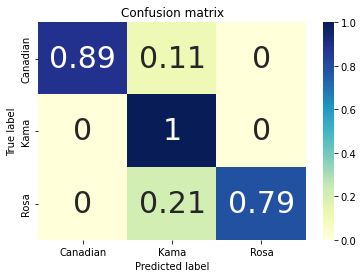

In [20]:
# Visualizing confusion matrixx

cm = confusion_matrix(y_test,log_pred_test) 
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [21]:
log_pred = log_reg.predict(X_valid)
print(classification_report(y_valid,log_pred))

              precision    recall  f1-score   support

    Canadian       1.00      0.55      0.71        11
        Kama       0.57      1.00      0.73         8
        Rosa       1.00      0.91      0.95        11

    accuracy                           0.80        30
   macro avg       0.86      0.82      0.80        30
weighted avg       0.89      0.80      0.80        30



In [22]:
all_results_valid['logistic_regression'] = accuracy_score(y_valid, log_pred)
all_results_test['logistic_regression'] = accuracy_score(y_test, log_pred_test)

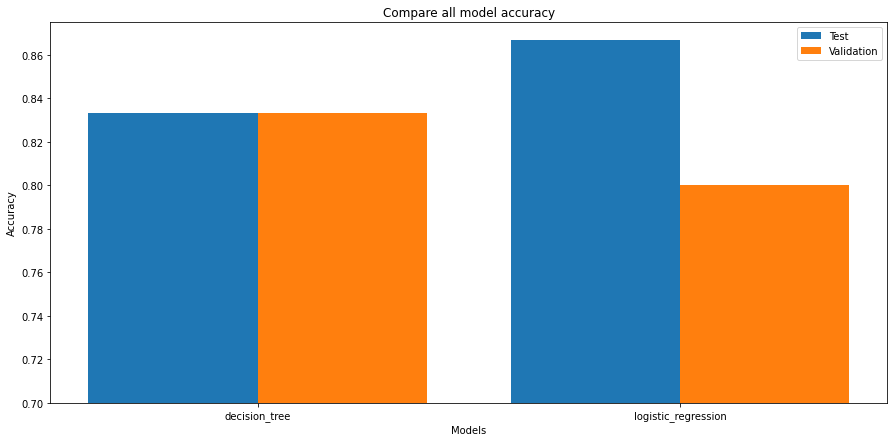

In [23]:
model = list(all_results_valid.keys())
accuracy = list(all_results_valid.values())
model_test = list(all_results_test.keys())
accuracy_test = list(all_results_test.values())
bottom_bar = 0.7
accuracy = [accuracy_i - bottom_bar for accuracy_i in accuracy]
accuracy_test = [accuracy_test_i - bottom_bar for accuracy_test_i in accuracy_test]

fig = plt.figure(figsize = (15, 7))
X_axis = np.arange(len(model))
  
plt.bar(X_axis - 0.2, accuracy_test, 0.4, bottom=bottom_bar, label = 'Test')
plt.bar(X_axis + 0.2, accuracy, 0.4, bottom=bottom_bar , label = 'Validation')
  
plt.xticks(X_axis, model)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Compare all model accuracy")
plt.legend()
plt.show()


In [24]:
# Create a Pickle file  
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(dtclf, pickle_out)
pickle_out.close()

In [25]:
dtclf.predict([[10,12,0.5,3,6,7,9]])

array(['Rosa'], dtype=object)